# Disclosure Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df_page = pd.read_excel('/project/Data/kw_predict_page_new.xlsx',encoding='utf-8',index_col=0)

In [3]:
df_page_short= df_page.loc[df_page['Climate']==1,['file_name','firm_name','year','total_page',
               'page_number','raw_text','header','report_type','Climate','Sector']].copy()

In [4]:
# For all other reports of HBSC, year-1 

In [5]:
for i,r in df_page_short.iterrows():
    if r['firm_name'] == 'HSBC_Holdings_Plc' and r['report_type'] == 'Other':
        ori = df_page_short.at[i,'year']
        df_page_short.at[i,'year'] = ori-1

In [6]:
df_page_short.drop_duplicates(subset=['file_name','raw_text'],inplace=True)

In [7]:
def remove_link(text):
    type_list = [r'https://[^\s]+','http://[^\s]+',r'www\.[^\s]+',
                 r'[^\s]+\.html','[^\s]+@[^\s]+','[^\s]+\.com[^\s]+']
    for t in type_list:
        text = re.sub(t,'',text)
    return text

In [8]:
def clean_text(text,keep_punc=False):
    if keep_punc == True:
        text = re.sub(r"[^A-Za-z0-9.,']",' ',text)
        text = re.sub(r' {2,}',' ',text)
    else: 
        text = re.sub(r'[^A-Za-z0-9 ]',' ',text)
        text = re.sub(r' {2,}',' ',text)
    return text

In [9]:
#0823

In [10]:
df_page_short['clean_text'] = df_page_short.raw_text.apply(lambda x: remove_link(x))
df_page_short['clean_text_lower'] = df_page_short.raw_text.apply(lambda x: remove_link(x).lower())

In [11]:
df_page_short['clean_text'] = df_page_short.clean_text_lower.apply(lambda x: clean_text(x,True))
df_page_short['clean_text_lower'] = df_page_short.clean_text_lower.apply(lambda x: clean_text(x))

In [12]:
df_page_short['contains_tcfd'] = df_page_short.clean_text_lower.apply(lambda x: 1 
                                                                      if re.search('tcfd',x)
                                                                     else 0)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") 
%matplotlib inline

## 1. Change in Number of Disclosures over the years

In [14]:
tmp = df_page_short.groupby(['file_name','year','total_page'],as_index=False)['Climate'].count()
tmp = tmp.groupby(['year'],as_index=False)['total_page','Climate'].sum()
tmp.rename(columns={'Climate':'Number of Climate-related Pages','total_page':'Total','year':"Year"},inplace=True)
# tmp['Climate-related Page Ratio'] = tmp['Climate-related']/tmp['Total']
# tmp = pd.melt(tmp, id_vars=['Year'], value_vars=['Total','Climate-related'],
#         var_name='Class', value_name='Number of Pages')

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


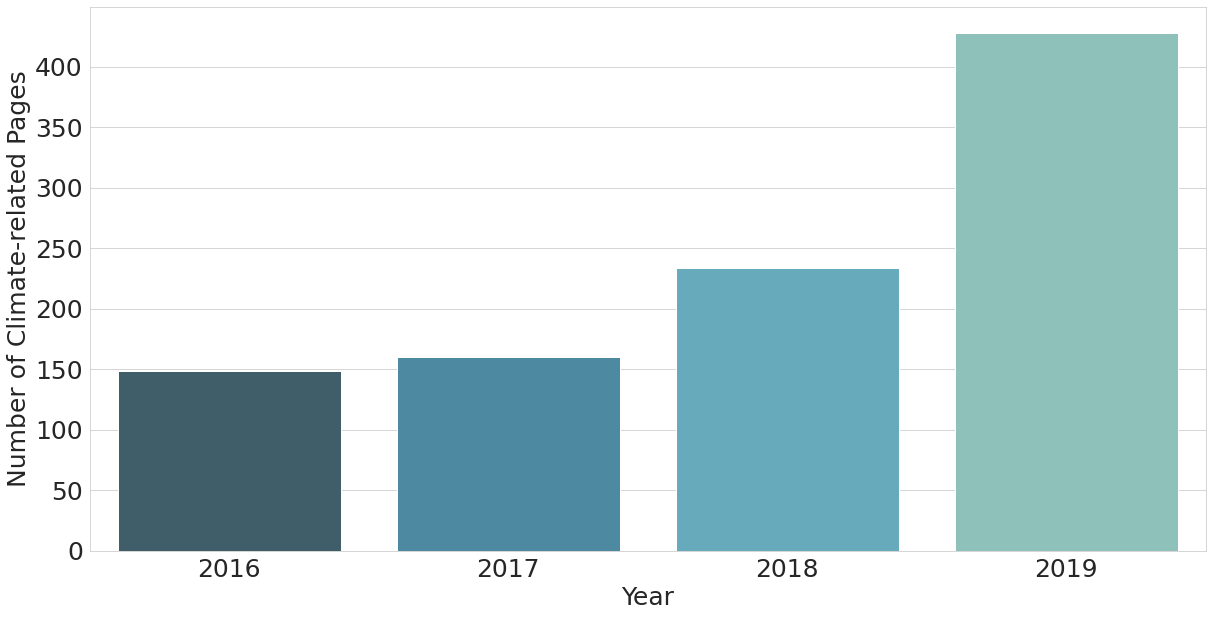

In [185]:
fig, ax = plt.subplots(figsize=(20,10))
plt.rc('font', size=25)
sns.barplot(x="Year", y='Number of Climate-related Pages',
                 data=tmp, palette="GnBu_d")
# plt.title('Ratio of Climate-Related Pages Over the Years')
plt.show()

In [18]:
tmp = df_page_short.groupby(['file_name','year','total_page'],as_index=False)['Climate'].count()
tmp.rename(columns={'Climate':'Number of Climate-related Pages','year':"Year"},inplace=True)

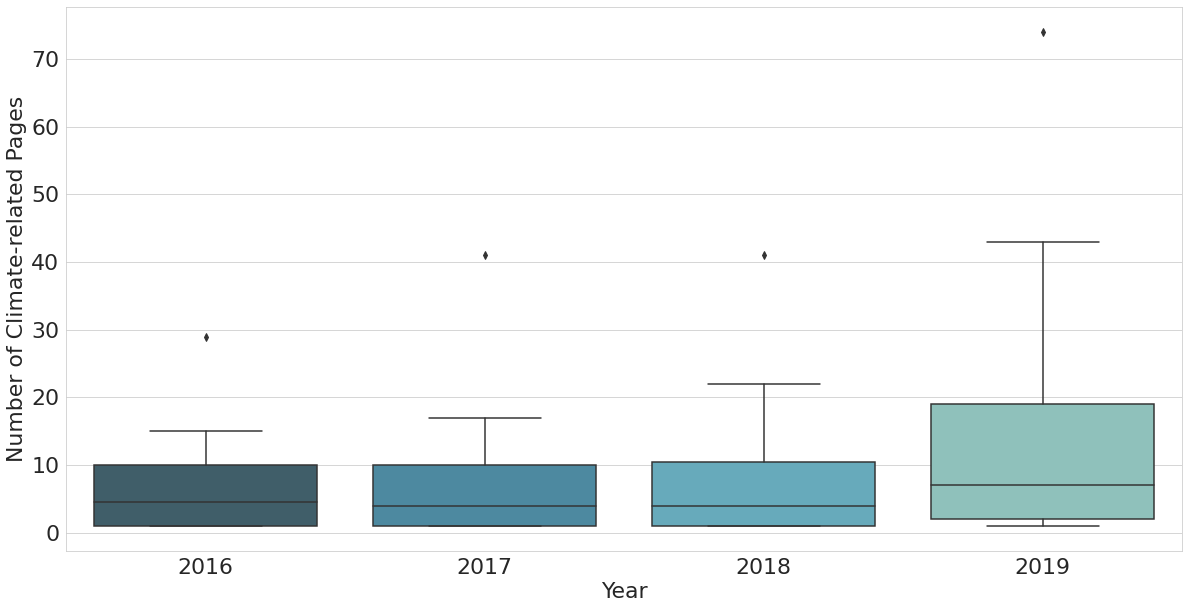

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
plt.rc('font', size=22)
sns.boxplot(x="Year", y='Number of Climate-related Pages',
                 data=tmp, palette="GnBu_d")
# plt.title('Distribution and Change in the Number of Climate-Related Pages')
plt.show()

In [109]:
#firm-level
tmp = df_page_short.groupby(['firm_name','year','total_page','Sector'],as_index=False)['Climate'].count()
tmp.rename(columns={'Climate':'Number of Climate-related Pages','year':"Year"},inplace=True)

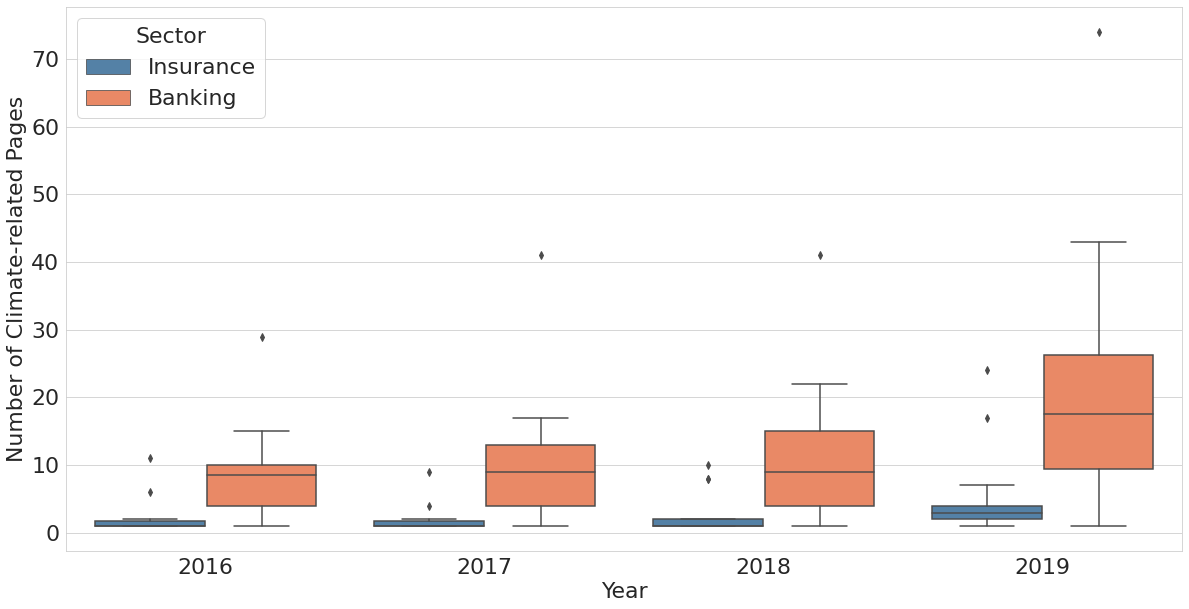

In [110]:
fig, ax = plt.subplots(figsize=(20,10))
plt.rc('font', size=22)
sns.boxplot(x="Year", y='Number of Climate-related Pages',hue='Sector',
                 data=tmp, palette={'Banking':'coral','Insurance':'steelblue'})
# plt.title('Distribution and Change in the Number of Climate-Related Pages by Sector')

plt.show()

# 2. Change in Sentiment

In [22]:
!pip install -U textblob


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)


In [23]:
!python -m textblob.download_corpora


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

[nltk_data] Downloading package brown to /home/faculty/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /home/faculty/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/faculty/nltk_data...
[nltk_data]   Package 

In [24]:
from textblob import TextBlob

In [25]:
def get_sentiment(text):
    senti_list= []
    blob = TextBlob(text)
    senti_list.append(blob.sentiment.polarity)
    senti_list.append(blob.sentiment.subjectivity)
    return senti_list

In [26]:
df_page_short['sentiment'] = df_page_short['clean_text'].apply(get_sentiment)
df_page_short[['Polarity','Subjectivity']] = pd.DataFrame(df_page_short.sentiment.tolist(),index= df_page_short.index)

In [27]:
tmp = df_page_short.groupby(['file_name','year'],as_index=False)['Polarity'].mean()
tmp = tmp.groupby(['year'],as_index=False)['Polarity'].mean()
tmp.rename(columns={'year':"Year"},inplace=True)

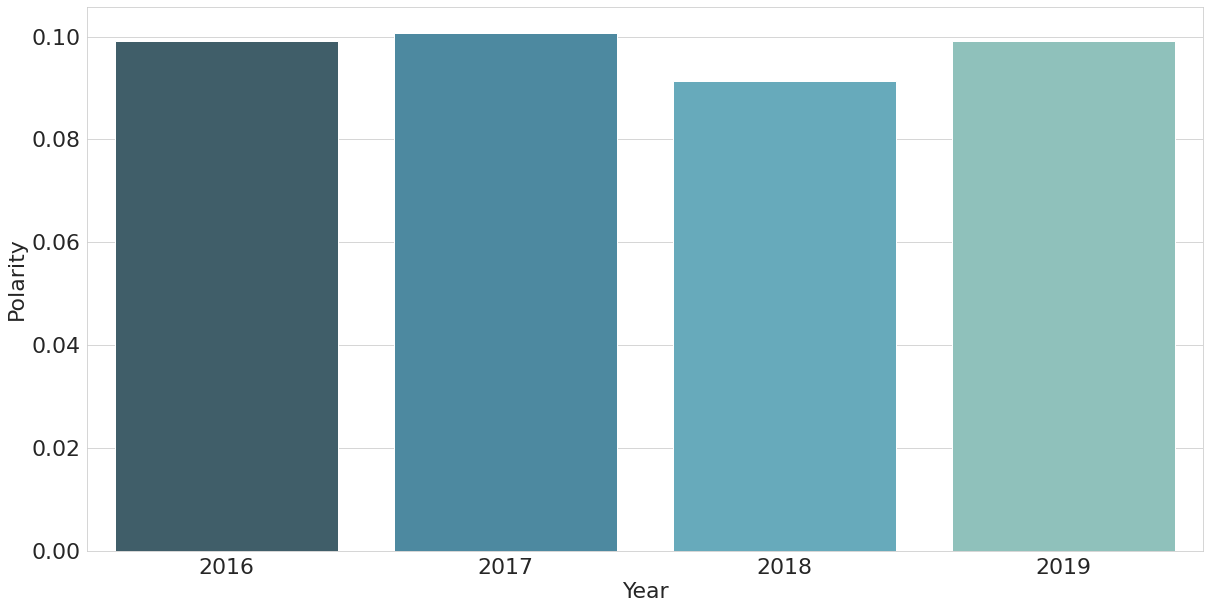

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x="Year", y='Polarity',
                 data=tmp, palette="GnBu_d")
# plt.title('Average Sentiment Over the Years')
plt.rc('font', size=25)
plt.show()

In [29]:
tmp = df_page_short.groupby(['file_name','year'],as_index=False)['Subjectivity'].mean()
tmp = tmp.groupby(['year'],as_index=False)['Subjectivity'].mean()
tmp.rename(columns={'subjectivity':'Subjectivity','year':"Year"},inplace=True)

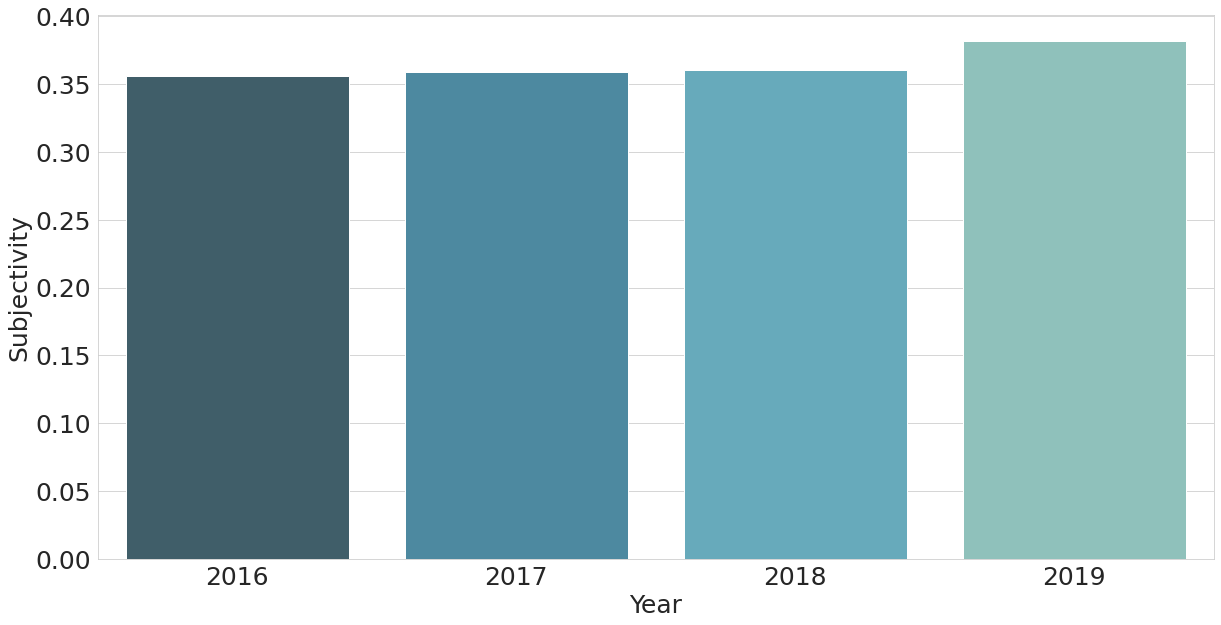

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x="Year", y='Subjectivity',
                 data=tmp, palette="GnBu_d")
# plt.title('Average Sentiment Over the Years')
plt.rc('font', size=25)
plt.show()

In [102]:
tmp = df_page_short.groupby(['firm_name','year','Sector'],as_index=False)['Polarity'].mean()
tmp = tmp.groupby(['year','Sector'],as_index=False).mean()
tmp.rename(columns={'year':"Year"},inplace=True)

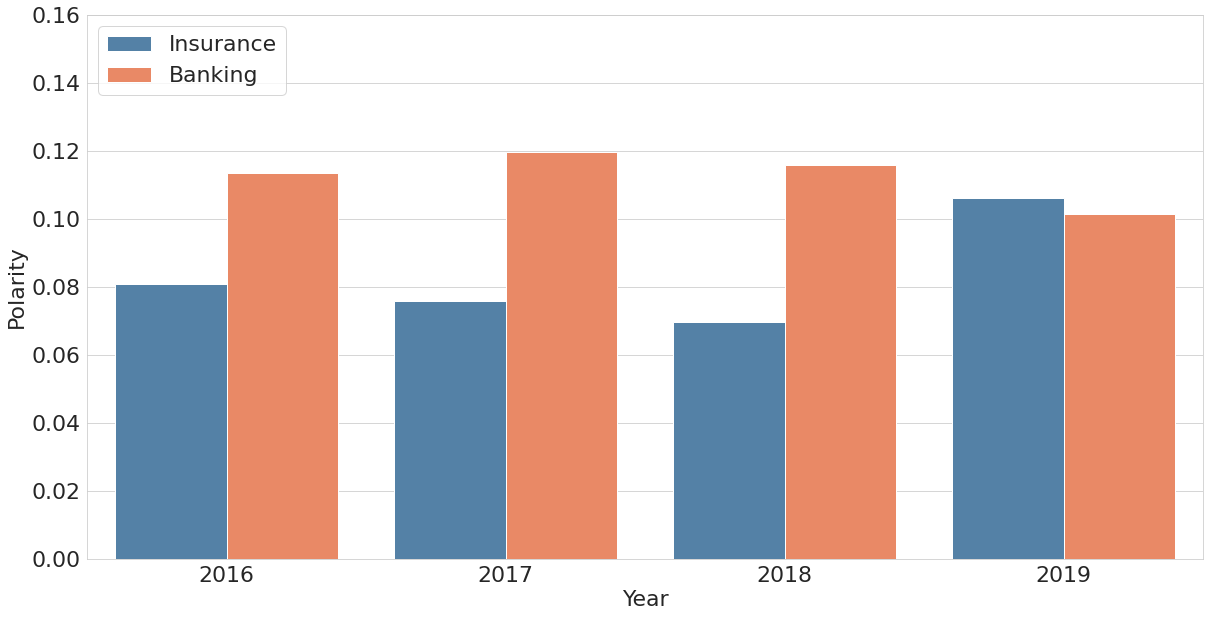

In [103]:
fig, ax = plt.subplots(figsize=(20,10))
plt.rc('font', size=22)
sns.barplot(x="Year", y='Polarity',hue='Sector',hue_order=['Insurance','Banking'],
                 data=tmp, palette={'Banking':'coral','Insurance':'steelblue'})
plt.legend(loc='upper left')
# plt.title('Change in the Polarity by Sector')
ax.set_ylim(0,0.16)
plt.show()

In [104]:
tmp = df_page_short.groupby(['firm_name','year','Sector'],as_index=False)['Subjectivity'].mean()
tmp = tmp.groupby(['year','Sector'],as_index=False).mean()
tmp.rename(columns={'year':"Year"},inplace=True)

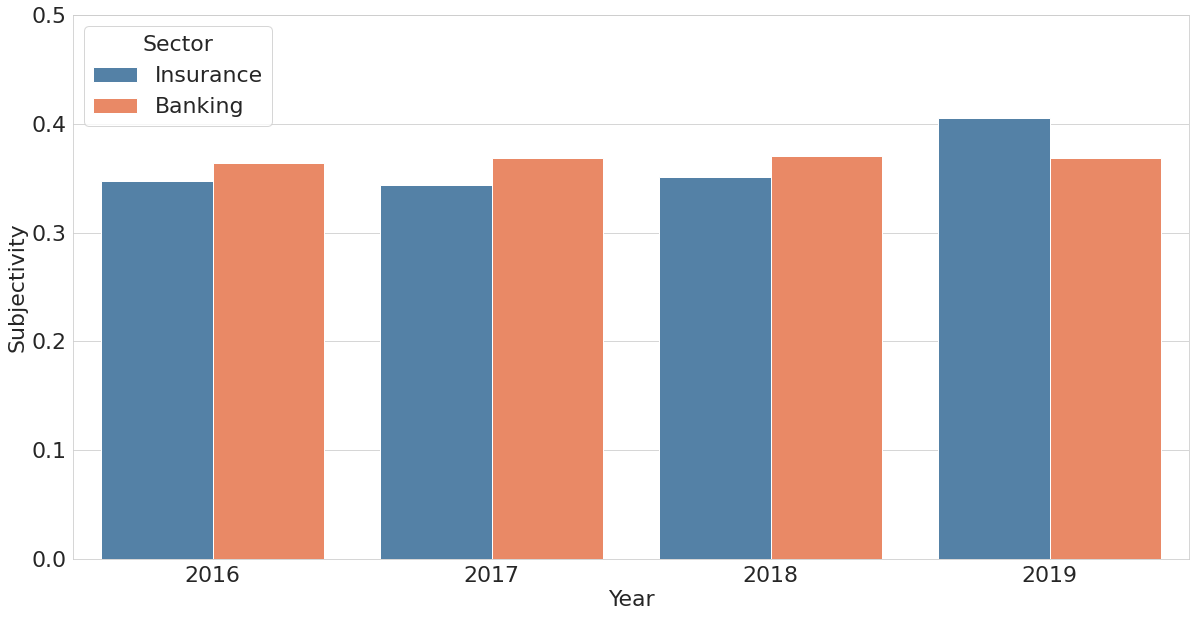

In [106]:
fig, ax = plt.subplots(figsize=(20,10))
plt.rc('font', size=22)
sns.barplot(x="Year", y='Subjectivity',hue='Sector',hue_order=['Insurance','Banking'],
                 data=tmp, palette={'Banking':'coral','Insurance':'steelblue'})
# plt.title('Change in the Subjectivity by Sector')
ax.set_ylim(0,0.5)
plt.show()

# 3. Complexity

In [35]:
!pip install textstat


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

  Using cached textstat-0.6.2-py3-none-any.whl (102 kB)
  Using cached Pyphen-0.9.5-py2.py3-none-any.whl (3.0 MB)


In [36]:
import textstat

In [37]:
def get_complexity(text):
    complexity=[]
    complexity.append(textstat.flesch_reading_ease(text))
    complexity.append(textstat.text_standard(text,float_output=True))
    return complexity

In [161]:
df_page_short['complexity'] = df_page_short['clean_text'].apply(get_complexity)
df_page_short[['Flesch_Reading_Ease','Text_Standard']] = pd.DataFrame(df_page_short.complexity.tolist(),
                                                                  index= df_page_short.index)

In [74]:
# tmp = df_page_short.groupby(['file_name','year'],as_index=False)['flesch_reading_ease'].mean()
# tmp = tmp.groupby(['year'],as_index=False)['flesch_reading_ease'].mean()
# tmp.rename(columns={'flesch_reading_ease':'Flesch_Reading_Ease','year':"Year"},inplace=True)

In [75]:
# fig, ax = plt.subplots(figsize=(20,10))
# sns.barplot(x="Year", y='Flesch_Reading_Ease',
#                  data=tmp, palette="GnBu_d")
# # plt.title('Average Sentiment Over the Years')
# plt.rc('font', size=25)
# plt.show()

In [76]:
# tmp = df_page_short.groupby(['file_name','year'],as_index=False)['text_standard'].mean()
# tmp = tmp.groupby(['year'],as_index=False)['text_standard'].mean()
# tmp.rename(columns={'text_standard':'Text_Standard','year':"Year"},inplace=True)

In [77]:
# fig, ax = plt.subplots(figsize=(20,10))
# # plt.title('Average Sentiment Over the Years')
# plt.rc('font', size=25)
# sns.barplot(x="Year", y='Text_Standard',
#                  data=tmp, palette="GnBu_d")

# plt.show()

In [78]:
# tmp = df_page_short.groupby(['firm_name','year','Sector'],as_index=False)['flesch_reading_ease'].mean()
# tmp = tmp.groupby(['year','Sector'],as_index=False)['flesch_reading_ease'].mean()
# tmp.rename(columns={'flesch_reading_ease':'Flesch_Reading_Ease','year':"Year"},inplace=True)

In [79]:
# fig, ax = plt.subplots(figsize=(20,10))

# plt.rc('font', size=22)
# sns.barplot(x="Year", y='Flesch_Reading_Ease',hue='Sector',
#                  data=tmp, palette="GnBu_d")
# # plt.title('Distribution and Change in the Flesch_Reading_Ease by Sector')

# plt.show()

In [111]:
tmp = df_page_short.groupby(['firm_name','year','Sector'],as_index=False)['Text_Standard'].mean()
tmp = tmp.groupby(['year','Sector'],as_index=False)['Text_Standard'].mean()
tmp.rename(columns={'year':"Year"},inplace=True)

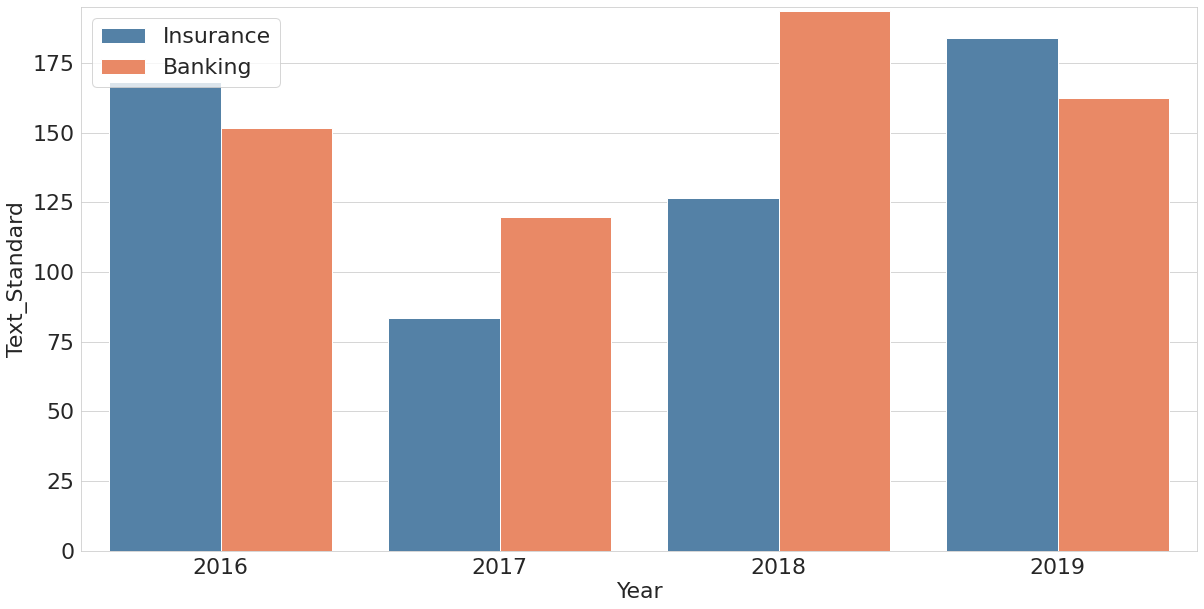

In [112]:
fig, ax = plt.subplots(figsize=(20,10))
plt.rc('font', size=22)
ax.set_ylim(0,195)
sns.barplot(x="Year", y='Text_Standard',hue='Sector',hue_order=['Insurance','Banking'],
                 data=tmp, palette={'Banking':'coral','Insurance':'steelblue'})
# plt.title('Distribution and Change in the Text_Standard by Sector')
plt.legend(loc='upper left')

plt.show()

In [192]:
len(df_page_short.clean_text.iloc[2])

3174

In [200]:
hp_text= '''Harry James[58] Potter (b. 31 July 1980[1]) was an English half-blood[2] wizard, and one of the most famous wizards of modern times. He was the only child and son of James and Lily Potter (née Evans), both members of the original Order of the Phoenix. Harry's birth was overshadowed by a prophecy, naming either himself or Neville Longbottom as the one with the power to vanquish Lord Voldemort. After half of the prophecy was reported to Voldemort, courtesy of Severus Snape, Harry was chosen as the target due to his many similarities with the Dark Lord. In turn, this caused the Potter family to go into hiding. Voldemort made his first vain attempt to circumvent the prophecy when Harry was a year and three months old. During this attempt, he murdered Harry's parents as they tried to protect him, but this unsuccessful attempt to kill Harry led to Voldemort's first downfall. This downfall marked the end of the First Wizarding War, and to Harry henceforth being known as the "Boy Who Lived",[5] as he was the only known survivor of the Killing Curse.

One consequence of Lily's loving sacrifice was that her orphaned son had to be raised by her only remaining blood relative, his Muggle aunt, Petunia Dursley. While in her care he would be protected from Lord Voldemort, due to the Bond of Blood charm Albus Dumbledore placed upon him.[59] This powerful charm would protect him until he became of age, or no longer called his aunt's house home. Due to Petunia's resentment of her sister and her magic gifts, Harry grew up abused and neglected.

On his eleventh birthday, Harry learned that he was a wizard, from Rubeus Hagrid.[60] He began attending Hogwarts School of Witchcraft and Wizardry in 1991. The Sorting Hat was initially going to Sort Harry into Slytherin House, but Harry pleaded 'not Slytherin' and the Hat heeded this plea, instead sorting the young wizard into Gryffindor House.[61] At school, Harry became best friends with Ron Weasley and Hermione Granger. He later became the youngest Quidditch Seeker in over a century and eventually the captain of the Gryffindor House Quidditch Team, winning two Quidditch Cups.[62] He became even better known in his early years for protecting the Philosopher's Stone from Voldemort, saving Ron's sister Ginny Weasley, solving the mystery of the Chamber of Secrets, slaying Salazar Slytherin's basilisk, and learning how to conjure a corporeal stag Patronus at the age of thirteen. In his fourth year, Harry won the Triwizard Tournament, although the competition ended with the tragic death of Cedric Diggory and the return of Lord Voldemort. During the next school year, Harry reluctantly taught and led Dumbledore's Army. He also fought in the Battle of the Department of Mysteries, during which he lost his godfather, Sirius Black.

Harry played a significant role in many other battles of the Second Wizarding War. He, Ron, and Hermione hunted down and destroyed Voldemort's Horcruxes. During the Battle of Hogwarts, Harry personally saw the deaths of Severus Snape and Fred Weasley while learning that Remus Lupin, Nymphadora Tonks, Colin Creevey, and many others had fallen in battle as well. He encountered Voldemort and sacrificed himself, knowing that his doing so was the only way to destroy the fragment of Voldemort's soul inside of him. In limbo, after Voldemort cursed him in the forest clearing, Albus Dumbledore gave Harry advice and background information on the Dark Lord. When told he could choose to live or to "move on", Harry chose to live. After he awoke, Harry confronted Voldemort and defeated him once and for all.

Harry was also noted for being the only known Master of Death, having united the three Deathly Hallows at the mere age of seventeen.

After the war, Harry became an Auror and helped reform and revolutionise the Ministry of Magic.[56] At some point, he married Ginny Weasley, with whom he had three children: James Sirius (named after his father and godfather), Albus Severus (named after Albus Dumbledore and Severus Snape), and Lily Luna (named after his mother and Luna Lovegood). He was also named the godfather of Edward Remus Lupin. In 2007 Harry was promoted to Head of the Auror Office at the age of 26,[63][55] and would occasionally deliver Defence Against the Dark Arts lectures at Hogwarts.[56] He later went on to be Head of the Department of Magical Law Enforcement by the summer of 2020.[57]'''

In [201]:
hp_text = re.sub(r"[^A-Za-z0-9,.']",' ',hp_text)
hp_text = re.sub(r' {2,}',' ',hp_text)
textstat.text_standard(hp_text,float_output=True)

13.0

In [198]:
len(hp_text)

4324

# 4. Crossectional Analysis (Average Ranking)

In [15]:
tmp = df_page_short.groupby(['firm_name','year','Sector'],as_index=False)['Climate'].count()
tmp.rename(columns={'Climate':'Number of Climate-related Pages',
                    'year':"Year",'firm_name':'Firm Name'},inplace=True)
tmp = tmp.groupby(['Firm Name','Sector'],as_index=False)\
                    ['Number of Climate-related Pages'].sum()
tmp['Number of Climate-related Pages'] = tmp['Number of Climate-related Pages']/4 
tmp.sort_values(by=['Number of Climate-related Pages'],ascending=False,inplace=True)

In [17]:
tmp

,Firm Name,Sector,Number of Climate-related Pages
8,Barclays_Plc,Banking,63.25
23,Standard_Chartered_Plc,Banking,40.25
14,HSBC_Holdings_Plc,Banking,27.75
21,Royal_Bank_of_Scotland_Group_Plc,Banking,20.00
16,Lloyds_Banking_Group,Banking,16.00
20,Royal_&_Sun_Alliance_Insurance_Plc,Insurance,13.50
22,Santander_UK_Group_Holdings_Plc,Banking,12.25
13,Direct_Line_Group,Insurance,9.25
26,Yorkshire_Building_Society,Banking,9.00
18,Nationwide_Building_Society,Banking,6.00


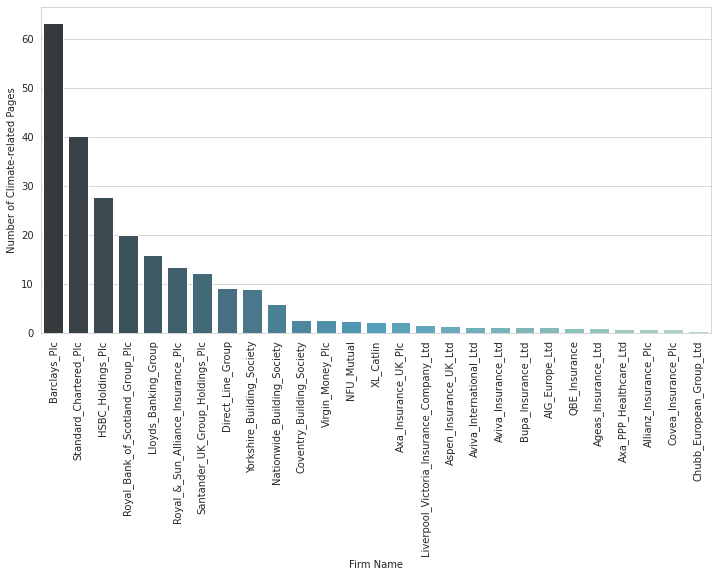

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rc('font', size=12)
ax = sns.barplot(x='Firm Name', y='Number of Climate-related Pages',
                 data=tmp, palette='GnBu_d')
plt.xticks(rotation=90)
plt.show()

In [179]:
tmp = df_page_short.groupby(['firm_name','year','Sector'],as_index=False)['Polarity'].mean()
tmp.rename(columns={'year':"Year",'firm_name':'Firm Name'},inplace=True)
tmp = tmp.groupby(['Firm Name','Sector'],as_index=False)\
                    ['Polarity'].mean()
tmp.sort_values(by=['Polarity'],ascending=False,inplace=True)

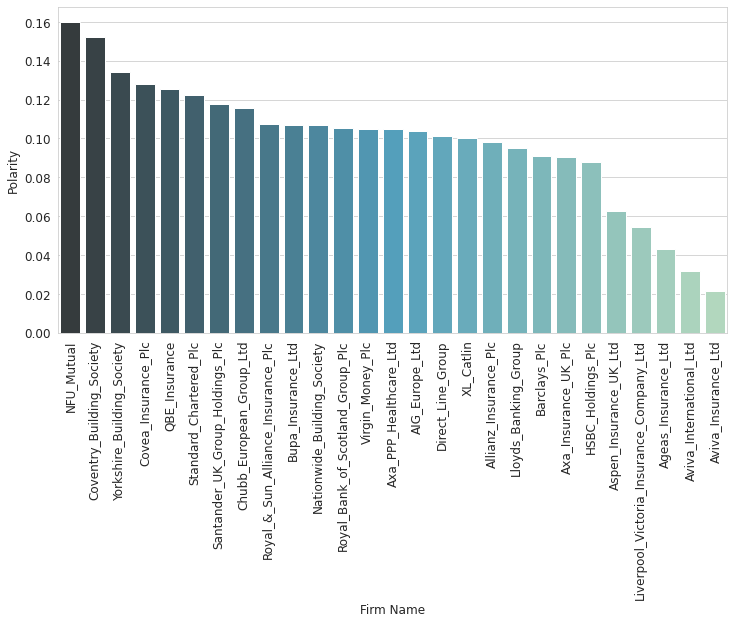

In [180]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rc('font', size=12)
ax = sns.barplot(x='Firm Name', y='Polarity',
                 data=tmp, palette='GnBu_d')
plt.xticks(rotation=90)
plt.show()

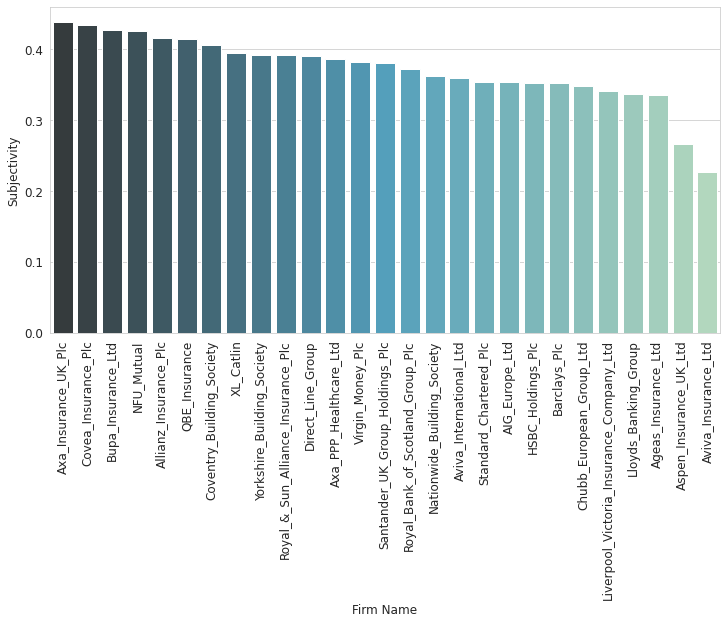

In [181]:
tmp = df_page_short.groupby(['firm_name','year','Sector'],as_index=False)['Subjectivity'].mean()
tmp.rename(columns={'year':"Year",'firm_name':'Firm Name'},inplace=True)
tmp = tmp.groupby(['Firm Name','Sector'],as_index=False)\
                    ['Subjectivity'].mean()
tmp.sort_values(by=['Subjectivity'],ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(12,6))
plt.rc('font', size=12)
ax = sns.barplot(x='Firm Name', y='Subjectivity',
                 data=tmp, palette='GnBu_d')
plt.xticks(rotation=90)
plt.show()

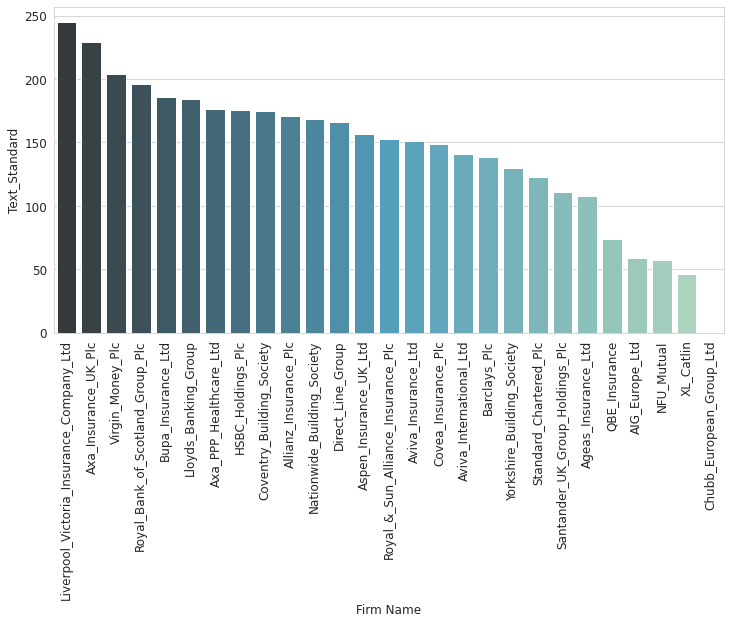

In [182]:
tmp = df_page_short.groupby(['firm_name','year','Sector'],as_index=False)['Text_Standard'].mean()
tmp.rename(columns={'year':"Year",'firm_name':'Firm Name'},inplace=True)
tmp = tmp.groupby(['Firm Name','Sector'],as_index=False)\
                    ['Text_Standard'].mean()
tmp.sort_values(by=['Text_Standard'],ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(12,6))
plt.rc('font', size=12)
ax = sns.barplot(x='Firm Name', y='Text_Standard',
                 data=tmp, palette='GnBu_d')
plt.xticks(rotation=90)
plt.show()

# 5.Disclosure Characteristics with Total Assets

In [126]:
df_finance = pd.read_excel('/project/Data/financial data.xlsx')
df_finance['firm_name'] = df_finance.file_name.apply(lambda x:
                               re.findall(r'.+(?=_Annual_Report)',x)[0])
df_finance['Year'] = df_finance.file_name.apply(lambda x:int(re.findall(r'[0-9]{4}',x)[0]))
total_assets = df_finance.loc[:,['file_name','(m)total assets','firm_name','Year']].copy()


In [150]:
#average page count per firm
tmp = df_page_short.groupby(['firm_name','year','Sector'],as_index=False)['Climate'].count()
tmp.rename(columns={'Climate':'Number of Climate-related Pages','year':"Year"},inplace=True)
assets_pagecount = total_assets.merge(tmp,how='left',right_on=['firm_name','Year']
                                      ,left_on=['firm_name','Year'])
assets_pagecount.rename(columns={'(m)total assets':'Total Assets(m)'},inplace=True)
assets_pagecount = assets_pagecount.groupby(['firm_name','Sector'],as_index=False)\
                    [['Number of Climate-related Pages','Total Assets(m)']].mean()

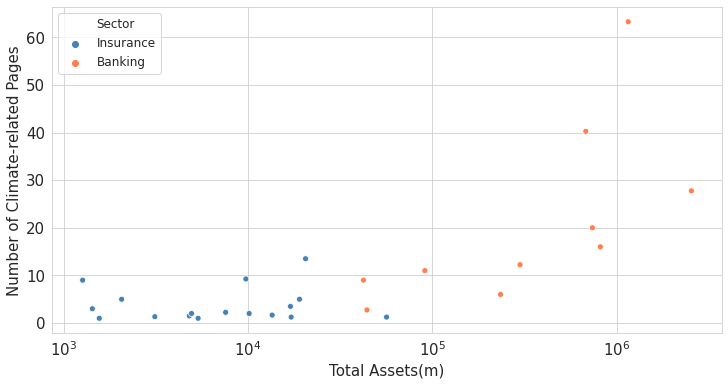

In [151]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rc('font', size=12)
ax = sns.scatterplot(x='Total Assets(m)', y='Number of Climate-related Pages',
                     hue='Sector',hue_order=['Insurance','Banking'],
                 data=assets_pagecount, palette={'Banking':'coral','Insurance':'steelblue'})

ax.set_xscale('log')

In [152]:
#average polarity  per firm
tmp = df_page_short.groupby(['firm_name','year','Sector'],as_index=False)['Polarity'].mean()
tmp.rename(columns={'year':"Year"},inplace=True)
assets_po = total_assets.merge(tmp,how='left',right_on=['firm_name','Year']
                                      ,left_on=['firm_name','Year'])
assets_po.rename(columns={'(m)total assets':'Total Assets(m)'},inplace=True)
assets_po = assets_po.groupby(['firm_name','Sector'],as_index=False)\
                    [['Polarity','Total Assets(m)']].mean()

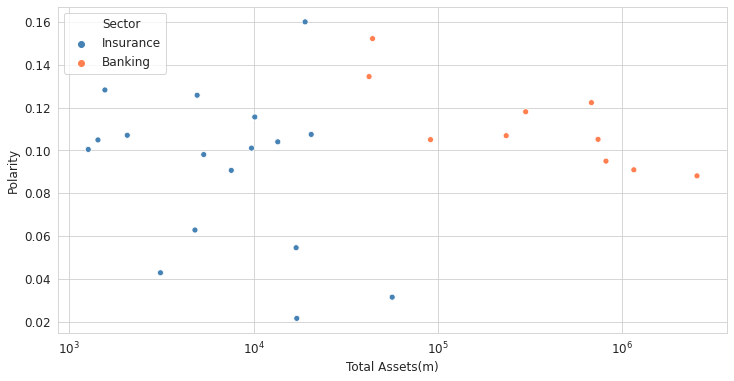

In [154]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rc('font', size=12)
ax = sns.scatterplot(x='Total Assets(m)', y='Polarity',
                     hue='Sector',hue_order=['Insurance','Banking'],
                 data=assets_po, palette={'Banking':'coral','Insurance':'steelblue'})
plt.legend(loc='upper left')
ax.set_xscale('log')

In [162]:
#average Subjectivity  per firm
tmp = df_page_short.groupby(['firm_name','year','Sector'],as_index=False)['Subjectivity'].mean()
tmp.rename(columns={'year':"Year"},inplace=True)
assets_sub = total_assets.merge(tmp,how='left',right_on=['firm_name','Year']
                                      ,left_on=['firm_name','Year'])
assets_sub.rename(columns={'(m)total assets':'Total Assets(m)'},inplace=True)
assets_sub = assets_sub.groupby(['firm_name','Sector'],as_index=False)\
                    [['Subjectivity','Total Assets(m)']].mean()

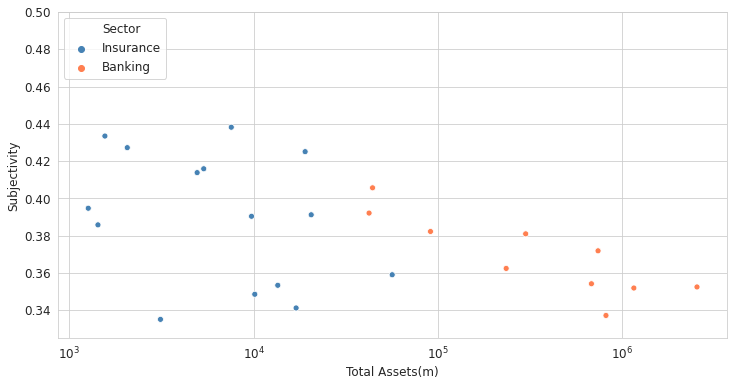

In [163]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rc('font', size=12)
ax = sns.scatterplot(x='Total Assets(m)', y='Subjectivity',
                     hue='Sector',hue_order=['Insurance','Banking'],
                 data=assets_sub, palette={'Banking':'coral','Insurance':'steelblue'})
ax.set_ylim(0.325,0.5)
plt.legend(loc='upper left')
ax.set_xscale('log')

In [164]:
#average Text_Standard  per firm
tmp = df_page_short.groupby(['firm_name','year','Sector'],as_index=False)['Text_Standard'].mean()
tmp.rename(columns={'year':"Year"},inplace=True)
assets_ts = total_assets.merge(tmp,how='left',right_on=['firm_name','Year']
                                      ,left_on=['firm_name','Year'])
assets_ts.rename(columns={'(m)total assets':'Total Assets(m)'},inplace=True)
assets_ts = assets_ts.groupby(['firm_name','Sector'],as_index=False)\
                    [['Text_Standard','Total Assets(m)']].mean()

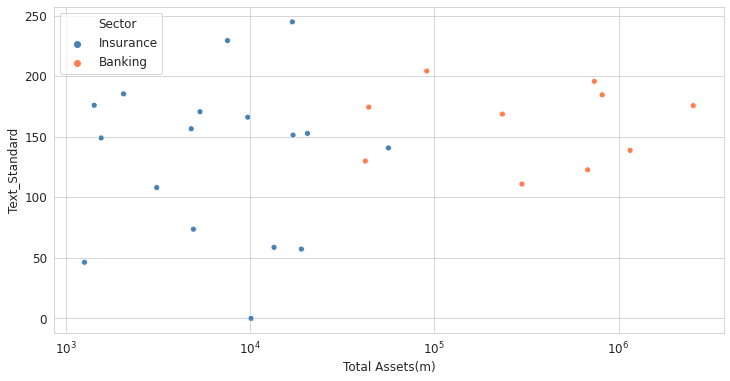

In [166]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rc('font', size=12)
ax = sns.scatterplot(x='Total Assets(m)', y='Text_Standard',
                     hue='Sector',hue_order=['Insurance','Banking'],
                 data=assets_ts, palette={'Banking':'coral','Insurance':'steelblue'})
plt.legend(loc='upper left')
ax.set_xscale('log')